In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

In [2]:
DF = pd.read_csv("https://raw.githubusercontent.com/ydafalla/EECS731-Final-Project/master/final.csv" , low_memory = False)
DF.head()

,Unnamed: 0,Passwords,length,Has_Upper,Has_Numeric,Has_SpecialChar,UpperCase_Count,LowerCase_Count,Numeric_Count,SpecialChar_Count,Alphabet_Count,Password_Source,Has_Word,Has_Name,Has_Place,Score,Password_Strength
0,0,@fl!pm0de@,10,0,1,1,0,6,1,3,6,Yahoo,0,0,0,5,Strong
1,1,pass,4,0,0,0,0,4,0,0,4,Yahoo,0,0,1,1,Weak
2,2,steveol,7,0,0,0,0,7,0,0,7,Yahoo,0,1,0,2,Weak
3,3,chotzi,6,0,0,0,0,6,0,0,6,Yahoo,0,1,0,1,Weak
4,4,lb2512,6,0,1,0,0,2,4,0,2,Yahoo,0,0,0,3,Medium


In [3]:
df1 = DF.loc[:,['Passwords' , 'length' , 'Alphabet_Count', 'Numeric_Count' , 'SpecialChar_Count', 'Score']]
df=DF.loc[:,['Passwords' , 'length' , 'Alphabet_Count', 'Numeric_Count' , 'SpecialChar_Count', 'UpperCase_Count']]
#Score = DF.loc[:,['Score']]
df.tail(20)

,Passwords,length,Alphabet_Count,Numeric_Count,SpecialChar_Count,UpperCase_Count
454462,rose9787,8,4,4,0,0
454463,Sbufadjb1,9,8,1,0,1
454464,Pineapple8*,11,9,1,1,1
454465,simon4255,9,5,4,0,0
454466,gurevich29,10,8,2,0,0
454467,NYMets18,8,6,2,0,3
454468,sunkist,7,7,0,0,0
454469,dxryandx,8,8,0,0,0
454470,Cheer07*,8,5,2,1,1
454471,baker24,7,5,2,0,0


In [4]:
df["length"] = df["length"]/df["length"].max()
df["Alphabet_Count"] = df["Alphabet_Count"]/df["Alphabet_Count"].max()
df["Numeric_Count"] = df["Numeric_Count"]/df["Numeric_Count"].max()
df["SpecialChar_Count"] = df["SpecialChar_Count"]/df["SpecialChar_Count"].max()
df["UpperCase_Count"] = df["UpperCase_Count"]/df["UpperCase_Count"].max()
df.tail(20)

,Passwords,length,Alphabet_Count,Numeric_Count,SpecialChar_Count,UpperCase_Count
454462,rose9787,0.266667,0.133333,0.181818,0.00,0.000000
454463,Sbufadjb1,0.300000,0.266667,0.045455,0.00,0.045455
454464,Pineapple8*,0.366667,0.300000,0.045455,0.05,0.045455
454465,simon4255,0.300000,0.166667,0.181818,0.00,0.000000
454466,gurevich29,0.333333,0.266667,0.090909,0.00,0.000000
454467,NYMets18,0.266667,0.200000,0.090909,0.00,0.136364
454468,sunkist,0.233333,0.233333,0.000000,0.00,0.000000
454469,dxryandx,0.266667,0.266667,0.000000,0.00,0.000000
454470,Cheer07*,0.266667,0.166667,0.090909,0.05,0.045455
454471,baker24,0.233333,0.166667,0.090909,0.00,0.000000


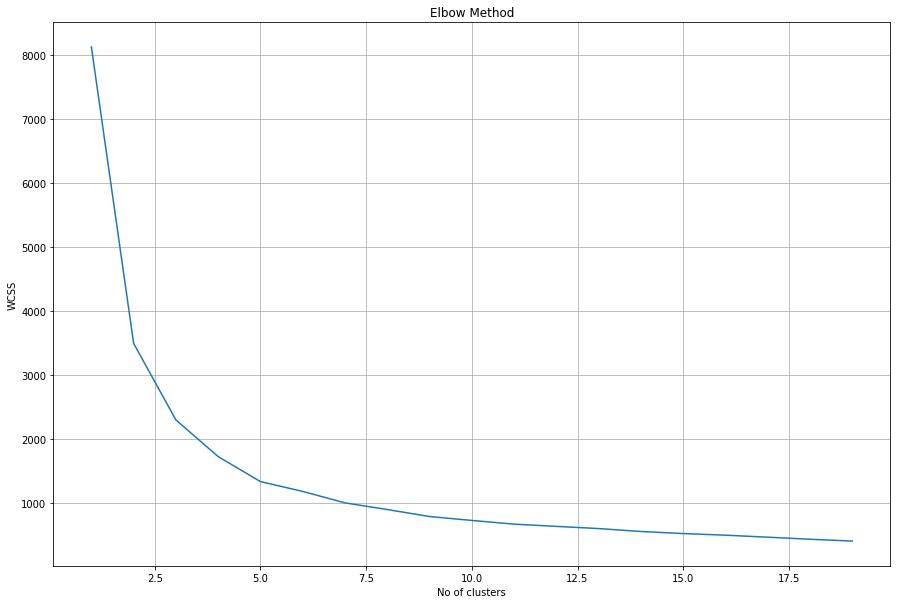

In [5]:
X = df
X = X.iloc[:,[2, 3 ,4]].values
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =100, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [6]:
kmeans = KMeans(n_clusters= 5, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)
df1["Clusters"] = Y_Kmeans

In [7]:
counter1 = counter2 = counter3 = counter4 =  counter5 =  0
for row in df1["Score"]:
    if row == 1:
        counter1 = counter1 + 1
    elif row == 2:
        counter2 = counter2 + 1
    elif row == 3:
        counter3 = counter3 + 1
    elif row == 4:
        counter4 = counter4 + 1
    else:
        counter5 = counter5 + 1
print(counter3)
Scores = [counter1 , counter2 , counter3 , counter4 , counter5]
#Scores.sort()

209719


In [8]:
cluster1 = cluster2 = cluster0 = cluster3 = cluster4 = 0

for row in df1["Clusters"]:
    if row == 1:
        cluster1 = cluster1 + 1
    elif row == 2:
        cluster2 = cluster2 + 1
    elif row == 3:
        cluster3 = cluster3 + 1
    elif row == 4:
        cluster4 = cluster4 + 1
    else:
        cluster0 = cluster0 + 1
Cluster = [cluster3, cluster0, cluster4, cluster2, cluster1]
#Cluster.sort()

In [9]:
df1.head()

,Passwords,length,Alphabet_Count,Numeric_Count,SpecialChar_Count,Score,Clusters
0,@fl!pm0de@,10,6,1,3,5,4
1,pass,4,4,0,0,1,4
2,steveol,7,7,0,0,2,4
3,chotzi,6,6,0,0,1,4
4,lb2512,6,2,4,0,3,1


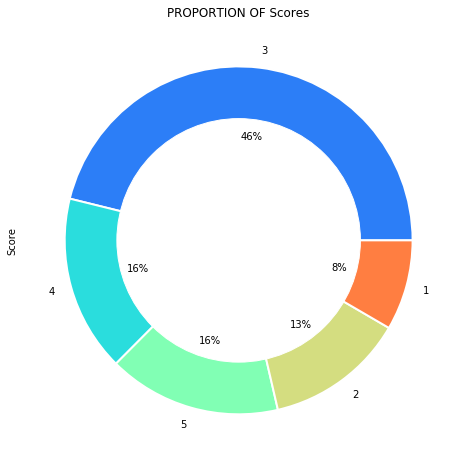

In [10]:
plt.figure(figsize=(8,8))
df1["Score"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",5),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF Scores")
plt.show()

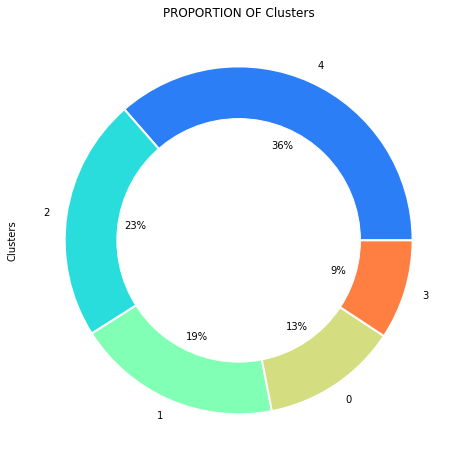

In [11]:
plt.figure(figsize=(8,8))
df1["Clusters"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",5),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF Clusters")
plt.show()

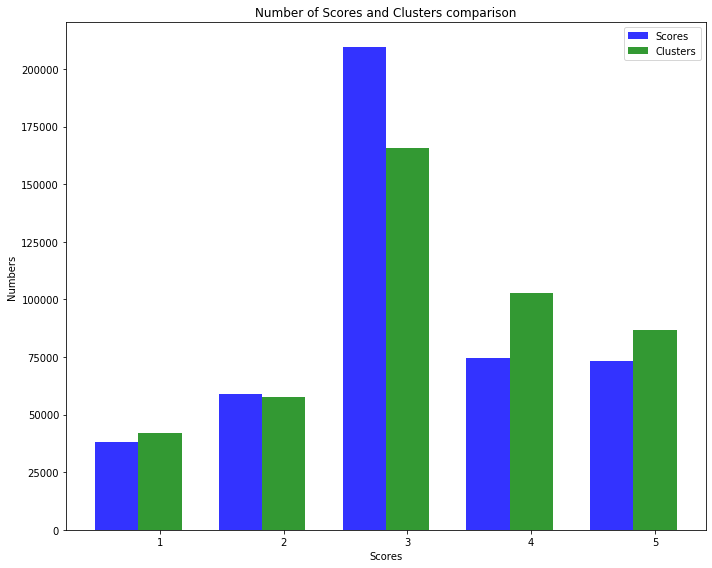

In [12]:

n_groups = 5
# create plot
fig = plt.figure(figsize=(10,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Scores, bar_width,
alpha=opacity,
color='b',
label='Scores')

rects2 = plt.bar(index + bar_width, Cluster, bar_width,
alpha=opacity,
color='g',
label='Clusters')
plt.xlabel('Scores')
plt.ylabel('Numbers')
plt.title('Number of Scores and Clusters comparison')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5'))
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
score = silhouette_score (X, Y_Kmeans, metric='euclidean')


In [17]:
print (" silhouette score is {})".format(score))

 silhouette score is 0.43622956992605383)


Text(0.5, 1.0, 'K-means')

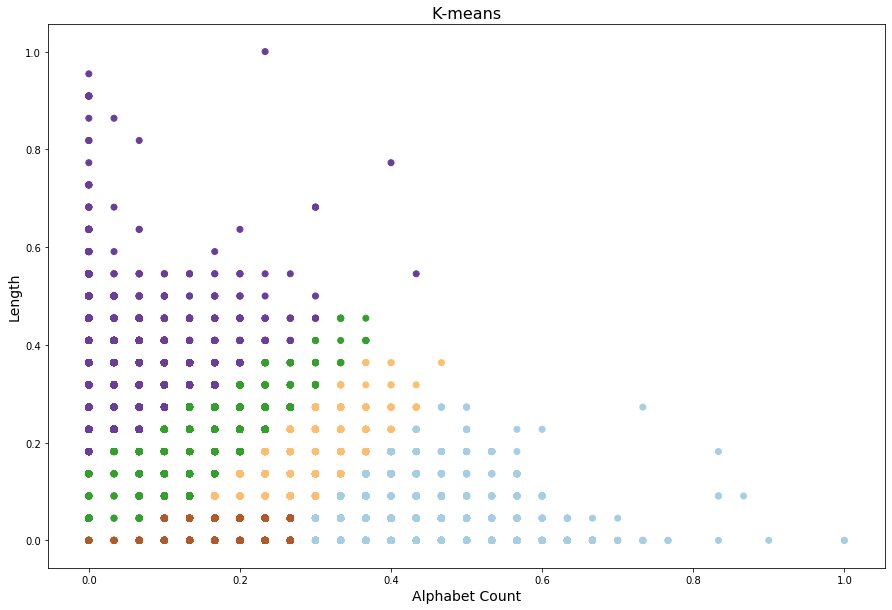

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(X[:,0], X[:,1] , c=Y_Kmeans, cmap='Paired')
plt.xlabel("Alphabet Count", size = 14)
plt.ylabel("Length" , size = 14)
plt.title("K-means" , size = 16)